In this Notebook, Logistic Regression and an Artificial Neural Network are applied to a dataset containing loan data from Lending Club with the purpose of determining which algorithm is superior at predicting the likelihood of loan default.

Description of dataset:

acc_now_delinq -- The number of accounts on which the borrower is now delinquent.

addr_state -- The state provided by the borrower in the loan application

annual_inc -- The self-reported annual income provided by the borrower during registration.

application_type --	Indicates whether the loan is an individual application or a joint application with two co-borrowers

chargeoff_within_12_mths --	Number of charge-offs within 12 months

collection_recovery_fee -- post charge off collection fee

collections_12_mths_ex_med -- Number of collections in 12 months excluding medical collections

delinq_2yrs -- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

delinq_amnt -- The past-due amount owed for the accounts on which the borrower is now delinquent.

desc -- Loan description provided by the borrower

dti -- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line -- The month the borrower's earliest reported credit line was opened

emp_length -- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

emp_title -- The job title supplied by the Borrower when applying for the loan.

fico_range_high -- The upper boundary range the borrower’s FICO at loan origination belongs to.

fico_range_low -- The lower boundary range the borrower’s FICO at loan origination belongs to.

funded_amnt -- The total amount committed to that loan at that point in time.

funded_amnt_inv -- The total amount committed by investors for that loan at that point in time.

grade -- LC assigned loan grade

home_ownership -- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

id -- A unique LC assigned ID for the loan listing.

initial_list_status -- The initial listing status of the loan. Possible values are – W, F

inq_last_6mths -- The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

installment -- The monthly payment owed by the borrower if the loan originates.

int_rate --	Interest Rate on the loan

issue_d -- The month which the loan was funded

last_credit_pull_d -- The most recent month LC pulled credit for this loan

last_fico_range_high -- The upper boundary range the borrower’s last FICO pulled belongs to.

last_fico_range_low -- The lower boundary range the borrower’s last FICO pulled belongs to.

last_pymnt_amnt -- Last total payment amount received

last_pymnt_d -- Last month payment was received

loan_amnt -- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

loan_status -- Current status of the loan

member_id -- A unique LC assigned Id for the borrower member.

mo_sin_old_il_acct -- Months since oldest bank installment account opened

mo_sin_old_rev_tl_op -- Months since oldest revolving account opened

mo_sin_rcnt_rev_tl_op -- Months since most recent revolving account opened

mo_sin_rcnt_tl -- Months since most recent account opened

mort_acc -- Number of mortgage accounts.

mths_since_last_delinq -- The number of months since the borrower's last delinquency.

mths_since_last_record -- The number of months since the last public record.

mths_since_recent_bc -- Months since most recent bankcard account opened.

mths_since_recent_bc_dlq -- Months since most recent bankcard delinquency

mths_since_recent_inq -- Months since most recent inquiry.

mths_since_recent_revol_delinq -- Months since most recent revolving delinquency.

next_pymnt_d -- Next scheduled payment date

num_accts_ever_120_pd -- Number of accounts ever 120 or more days past due

num_actv_bc_tl -- Number of currently active bankcard accounts

num_actv_rev_tl -- Number of currently active revolving trades

num_bc_sats -- Number of satisfactory bankcard accounts

num_bc_tl -- Number of bankcard accounts

num_il_tl -- Number of installment accounts

num_op_rev_tl -- Number of open revolving accounts

num_rev_accts -- Number of revolving accounts

num_rev_tl_bal_gt_0 -- Number of revolving trades with balance >0

num_sats -- Number of satisfactory accounts

num_tl_120dpd_2m -- Number of accounts currently 120 days past due (updated in past 2 months)

num_tl_30dpd -- Number of accounts currently 30 days past due (updated in past 2 months)

num_tl_90g_dpd_24m -- Number of accounts 90 or more days past due in last 24 months

num_tl_op_past_12m -- Number of accounts opened in past 12 months

open_acc -- The number of open credit lines in the borrower's credit file.

out_prncp -- Remaining outstanding principal for total amount funded

out_prncp_inv -- Remaining outstanding principal for portion of total amount funded by investors

pct_tl_nvr_dlq -- Percent of trades never delinquent

percent_bc_gt_75 -- Percentage of all bankcard accounts > 75% of limit.

policy_code -- "publicly available policy_code=1
                new products not publicly available policy_code=2"
                
pub_rec -- Number of derogatory public records

pub_rec_bankruptcies -- Number of public record bankruptcies

purpose -- A category provided by the borrower for the loan request. 

pymnt_plan -- Indicates if a payment plan has been put in place for the loan

recoveries -- post charge off gross recovery

revol_bal -- Total credit revolving balance

revol_util -- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

sub_grade -- LC assigned loan subgrade

tax_liens -- Number of tax liens

term -- The number of payments on the loan. Values are in months and can be either 36 or 60.

title -- The loan title provided by the borrower

tot_hi_cred_lim -- Total high credit/credit limit

total_acc -- The total number of credit lines currently in the borrower's credit file

total_bal_ex_mort -- Total credit balance excluding mortgage

total_bc_limit -- Total bankcard high credit/credit limit

total_il_high_credit_limit -- Total installment high credit/credit limit

total_pymnt -- Payments received to date for total amount funded

total_pymnt_inv -- Payments received to date for portion of total amount funded by investors

total_rec_int -- Interest received to date

total_rec_late_fee -- Late fees received to date

total_rec_prncp -- Principal received to date

url -- URL for the LC page with listing data.

verification_status -- Indicates if income was verified by LC, not verified, or if the income source was verified

zip_code -- The first 3 numbers of the zip code provided by the borrower in the loan application.


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

## Set Global Options

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_info_columns = 500

## View Data

In [3]:
credit_data = pd.read_csv('loan.csv', low_memory=False)

In [4]:
numRows, numFeatures = credit_data.shape

In [5]:
print(f'There are {numRows} rows and {numFeatures} features in the dataset')

There are 39717 rows and 111 features in the dataset


In [6]:
credit_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

## Remove columns that are irrelevant in predicting loan default

In [8]:
#Remove the following columns:
#id - just an ID assigned to the loan
#member_id - just an ID assigned to the borrower
#funded_amnt - calculated after loan distribution
#funded_amnt_inv - calculated after loan distribution
#issue_d - the loan month is irrelevant
#url - url data is irrelevant
#desc - free text, not categorical
#emp_title - free text, lots of null values, mainly just name of workplace, not as important as emp_length or income
#title - free text, not categorical
#zip_code - zip code is irrelevant
#addr_state - location is irrelevant
#initial_list_status - more relevant to investors
#out_prncp - calculated after loan distribution
#out_prncp_inv - calculated after loan distribution
#total_pymnt - calculated after loan distribution
#total_pymnt_inv - calculated after loan distribution
#total_rec_prncp - calculated after loan distribution
#total_rec_int - calculated after loan distribution
#total_rec_late_fee - calculated after loan distribution
#recoveries - calculated after loan distribution
#delinq_amnt - calculated after loan distribution
#collection_recovery_fee - calculated after loan distribution
#last_pymnt_d - calculated after loan distribution
#last_credit_pull_d - calculated after loan distribution
#last_pymnt_amnt - calculated after loan distribution
#next_pymnt_d - calculated after loan distribution

In [9]:
columns_to_drop = [
    'id',
    'member_id',
    'funded_amnt',
    'funded_amnt_inv',
    'issue_d',
    'url',
    'desc',
    'emp_title',
    'title',
    'zip_code',
    'addr_state',
    'initial_list_status',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_credit_pull_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'delinq_amnt'
]

In [10]:
irrel_col_count = len(columns_to_drop)

In [11]:
num_predictor_features = numFeatures - 1

In [12]:
print(f'Out of {num_predictor_features} predictor features, {irrel_col_count} features are not relevant in the prediction of loan default.')

Out of 110 predictor features, 26 features are not relevant in the prediction of loan default.


In [13]:
#Remove these columns
credit_data_clean = credit_data.drop(columns=columns_to_drop, axis=1)

In [14]:
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 85 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       39717 non-null  int64  
 1   term                            39717 non-null  object 
 2   int_rate                        39717 non-null  object 
 3   installment                     39717 non-null  float64
 4   grade                           39717 non-null  object 
 5   sub_grade                       39717 non-null  object 
 6   emp_length                      38642 non-null  object 
 7   home_ownership                  39717 non-null  object 
 8   annual_inc                      39717 non-null  float64
 9   verification_status             39717 non-null  object 
 10  loan_status                     39717 non-null  object 
 11  pymnt_plan                      39717 non-null  object 
 12  purpose                         

## Clean up Null values

### Remove all columns that only contain null values

In [15]:
#Several columns contain only null values.
#We must find all columns that contain only null values in order to remove them
null_columns = list(credit_data_clean.columns[credit_data_clean.isnull().all()])
num_null_columns = len(null_columns)

In [16]:
print(f'The dataset contains {num_null_columns} columns that only contain Null values.')

The dataset contains 54 columns that only contain Null values.


In [17]:
print('The columns that contain only Null values:')
print(null_columns)

The columns that contain only Null values:
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort

In [18]:
#Drop these columns from the dataset
credit_data_clean.drop(null_columns, axis=1, inplace=True)

In [19]:
#Verify that the Null columns were removed from the data set
credit_data_clean.info(max_cols=60)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   term                        39717 non-null  object 
 2   int_rate                    39717 non-null  object 
 3   installment                 39717 non-null  float64
 4   grade                       39717 non-null  object 
 5   sub_grade                   39717 non-null  object 
 6   emp_length                  38642 non-null  object 
 7   home_ownership              39717 non-null  object 
 8   annual_inc                  39717 non-null  float64
 9   verification_status         39717 non-null  object 
 10  loan_status                 39717 non-null  object 
 11  pymnt_plan                  39717 non-null  object 
 12  purpose                     39717 non-null  object 
 13  dti                         397

### Clean up remaining Null values

In [20]:
#View which columns contain null values, and how many null values are present in these columns
credit_data_clean.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
collections_12_mths_ex_med       56
policy_code                       0
application_type                  0
acc_now_delinq              

In [21]:
#Calculate the percentage of which each column consists of Null values
(credit_data_clean.isnull().sum() / len(credit_data_clean)) * 100

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
revol_util                     0.125891
total_acc                      0.000000
collections_12_mths_ex_med     0.140998


In [22]:
#More than 50% of mths_since_last_delinq column and mths_since_last_record column is empty, so we will remove those columns
credit_data_clean.drop(['mths_since_last_delinq', 'mths_since_last_record'], axis=1, inplace=True)

In [23]:
#Of the remaining columns that contain Null values, less than 2% of these columns consist of Null values, so we will just remove the rows that contain Null values
credit_data_clean.dropna(axis=0, inplace=True)

In [24]:
#Verify that dataset no longer contains null values
credit_data_clean.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
policy_code                   0
application_type              0
acc_now_delinq                0
chargeoff_within_12_mths      0
pub_rec_bankruptcies          0
tax_liens                     0
dtype: int64

In [25]:
#Now the dataset contains 24,944 rows. Down from the original 39,717 rows
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37896 entries, 0 to 39623
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37896 non-null  int64  
 1   term                        37896 non-null  object 
 2   int_rate                    37896 non-null  object 
 3   installment                 37896 non-null  float64
 4   grade                       37896 non-null  object 
 5   sub_grade                   37896 non-null  object 
 6   emp_length                  37896 non-null  object 
 7   home_ownership              37896 non-null  object 
 8   annual_inc                  37896 non-null  float64
 9   verification_status         37896 non-null  object 
 10  loan_status                 37896 non-null  object 
 11  pymnt_plan                  37896 non-null  object 
 12  purpose                     37896 non-null  object 
 13  dti                         378

In [26]:
credit_data_clean.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,37896.000000,37896.000000,3.789600e+04,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.0,37896.0,37896.0,37896.0,37896.000000,37896.0
mean,11324.444532,327.052096,6.964050e+04,13.374947,0.145952,0.867453,9.322013,0.053752,13470.018340,22.189387,0.0,1.0,0.0,0.0,0.041535,0.0
std,7478.634946,209.137297,6.360539e+04,6.656744,0.490946,1.066903,4.375173,0.234818,15870.302047,11.383738,0.0,0.0,0.0,0.0,0.200450,0.0
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5600.000000,168.670000,4.180000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3786.750000,14.000000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,10000.000000,283.050000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8969.500000,21.000000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,15000.000000,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17173.250000,29.000000,0.0,1.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,2.000000,0.0


### Remove columns that only contain one value

In [27]:
#Some columns have a std of 0.0, meaning that they contain only one unique value.
#These columns will not assist in creating a model, so we will remove them
credit_data_clean.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
count,37896.000000,37896.000000,3.789600e+04,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.0,37896.0,37896.0,37896.0,37896.000000,37896.0
mean,11324.444532,327.052096,6.964050e+04,13.374947,0.145952,0.867453,9.322013,0.053752,13470.018340,22.189387,0.0,1.0,0.0,0.0,0.041535,0.0
std,7478.634946,209.137297,6.360539e+04,6.656744,0.490946,1.066903,4.375173,0.234818,15870.302047,11.383738,0.0,0.0,0.0,0.0,0.200450,0.0
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.0,1.0,0.0,0.0,0.000000,0.0
25%,5600.000000,168.670000,4.180000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3786.750000,14.000000,0.0,1.0,0.0,0.0,0.000000,0.0
50%,10000.000000,283.050000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8969.500000,21.000000,0.0,1.0,0.0,0.0,0.000000,0.0
75%,15000.000000,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17173.250000,29.000000,0.0,1.0,0.0,0.0,0.000000,0.0
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,0.0,1.0,0.0,0.0,2.000000,0.0


In [28]:
uniqueColumns = credit_data_clean.columns[credit_data_clean.nunique() <= 1]

In [29]:
uniqueColumns

Index(['pymnt_plan', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'tax_liens'],
      dtype='object')

In [30]:
credit_data_clean.drop(uniqueColumns, axis=1, inplace=True)

In [31]:
#Verify that all columns contain a std greater than 0.0
credit_data_clean.describe()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,37896.000000,37896.000000,3.789600e+04,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000,37896.000000
mean,11324.444532,327.052096,6.964050e+04,13.374947,0.145952,0.867453,9.322013,0.053752,13470.018340,22.189387,0.041535
std,7478.634946,209.137297,6.360539e+04,6.656744,0.490946,1.066903,4.375173,0.234818,15870.302047,11.383738,0.200450
min,500.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5600.000000,168.670000,4.180000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3786.750000,14.000000,0.000000
50%,10000.000000,283.050000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8969.500000,21.000000,0.000000
75%,15000.000000,434.750000,8.350000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17173.250000,29.000000,0.000000
max,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [32]:
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37896 entries, 0 to 39623
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37896 non-null  int64  
 1   term                  37896 non-null  object 
 2   int_rate              37896 non-null  object 
 3   installment           37896 non-null  float64
 4   grade                 37896 non-null  object 
 5   sub_grade             37896 non-null  object 
 6   emp_length            37896 non-null  object 
 7   home_ownership        37896 non-null  object 
 8   annual_inc            37896 non-null  float64
 9   verification_status   37896 non-null  object 
 10  loan_status           37896 non-null  object 
 11  purpose               37896 non-null  object 
 12  dti                   37896 non-null  float64
 13  delinq_2yrs           37896 non-null  int64  
 14  earliest_cr_line      37896 non-null  object 
 15  inq_last_6mths     

## Clean up 'loan_status' column

### Only keep rows in which 'loan_status' = 'Fully Paid' or 'Charged Off'

In [33]:
credit_data_clean['loan_status'].value_counts()

Fully Paid     31533
Charged Off     5265
Current         1098
Name: loan_status, dtype: int64

In [34]:
#Remove rows that have a loan_status value that isn't 'Fully Paid' or 'Charged Off' because we don't know yet the final outcome of loans that are 'Current'
credit_data_clean = credit_data_clean[credit_data_clean['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [35]:
#Ensure that the rows containing loan_status values other than 'Fully Paid' and 'Charged Off' were removed
credit_data_clean['loan_status'].value_counts()

Fully Paid     31533
Charged Off     5265
Name: loan_status, dtype: int64

### Convert 'Fully Paid' to 0 and 'Charged Off' to 1

In [36]:
#Fully Paid = 0
#Default = 1
credit_data_clean['loan_status'] = credit_data_clean['loan_status'].replace(to_replace=['Fully Paid', 'Charged Off'], value=[0, 1])

In [37]:
#Ensure that the rows containing loan_status values were converted to 0 and 1
credit_data_clean['loan_status'].value_counts()

0    31533
1     5265
Name: loan_status, dtype: int64

## CLEAN UP DATA FORMATS

### Remove unnecessary text from numerical columns

In [38]:
#The following columns contain unecessary text. For example, 'term' contains values like '36 months'. This needs to be changed to just '36'
#term
#int_rate
#emp_length
#revol_util
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,0,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,1,car,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,0,small_business,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,0,other,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,0,wedding,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0


In [39]:
columns_with_unnecessary_text = [
    'term',
    'int_rate',
    'emp_length',
    'revol_util'
]

In [40]:
def remove_text(cell):
    return re.sub('[^0-9,.]', '', cell)

In [41]:
for col in columns_with_unnecessary_text:
    credit_data_clean[col] = credit_data_clean[col].map(remove_text)

In [42]:
#Verify that the unnecessary text was removed from the columns
credit_data_clean.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0


### Create a column that contains the number of months that have passed since 'earliest_cr_line'

In [43]:
#We need to calculate the number of months that have passed since the person first opened a credit line using the earliest_cr_line column.
#The problem is that if I convert the Mon-YY data in this column to the datetime format, then it will incorrectly convert some 19xx dates to 20xx dates.
#In Python, When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.

In [44]:
credit_data_clean.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,Feb-96,1,10,0,5598,21,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,Nov-04,3,9,0,7963,28.30,12,0.0


In [45]:
#'earliest_cr_line' is currently a String column, so first convert column to datetime column of the form YYYY-MM-DD in order to perform the calculations
credit_data_clean['earliest_cr_line'] = pd.to_datetime(credit_data_clean['earliest_cr_line'], format='%b-%y')

In [46]:
#Verify that the format of the earliest_cr_line column has been converted
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,1996-02-01,1,10,0,5598,21,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0


In [47]:
max(credit_data_clean['earliest_cr_line'])

Timestamp('2068-12-01 00:00:00')

In [48]:
import datetime as dt

In [49]:
#In Python, When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards: values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.
#We will fix this by checking if the year of the earliest_cr_line date is greater than 2020. If it is, we will subtract 100 years from it.
def fix_year(date_val):

    if date_val.year > 2020:

        year = date_val.year - 100

    else:

        year = date_val.year

    return dt.date(year,date_val.month,date_val.day)


In [50]:
credit_data_clean['earliest_cr_line'] = credit_data_clean['earliest_cr_line'].apply(fix_year)

In [51]:
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.0
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.0
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,1996-02-01,1,10,0,5598,21,37,0.0
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0


In [52]:
#Verfiy that the maximum value in the earliest_cr_line column is not a date beyond 2020
max(credit_data_clean['earliest_cr_line'])

datetime.date(2008, 11, 1)

In [53]:
#Create a new column that contains the current date
credit_data_clean['current_date'] = np.datetime64('today')

In [54]:
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,current_date
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.0,2020-11-04
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0,2020-11-04
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.0,2020-11-04
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,1996-02-01,1,10,0,5598,21,37,0.0,2020-11-04
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0,2020-11-04


In [55]:
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36798 non-null  int64         
 1   term                  36798 non-null  object        
 2   int_rate              36798 non-null  object        
 3   installment           36798 non-null  float64       
 4   grade                 36798 non-null  object        
 5   sub_grade             36798 non-null  object        
 6   emp_length            36798 non-null  object        
 7   home_ownership        36798 non-null  object        
 8   annual_inc            36798 non-null  float64       
 9   verification_status   36798 non-null  object        
 10  loan_status           36798 non-null  int64         
 11  purpose               36798 non-null  object        
 12  dti                   36798 non-null  float64       
 13  delinq_2yrs     

In [56]:
credit_data_clean['earliest_cr_line'] = pd.to_datetime(credit_data_clean['earliest_cr_line'])

In [57]:
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36798 non-null  int64         
 1   term                  36798 non-null  object        
 2   int_rate              36798 non-null  object        
 3   installment           36798 non-null  float64       
 4   grade                 36798 non-null  object        
 5   sub_grade             36798 non-null  object        
 6   emp_length            36798 non-null  object        
 7   home_ownership        36798 non-null  object        
 8   annual_inc            36798 non-null  float64       
 9   verification_status   36798 non-null  object        
 10  loan_status           36798 non-null  int64         
 11  purpose               36798 non-null  object        
 12  dti                   36798 non-null  float64       
 13  delinq_2yrs     

In [58]:
#Create a new column that calculates the number of months that have passed since the person first opened a credit line
credit_data_clean['cr_length_months'] = credit_data_clean['current_date'] - credit_data_clean['earliest_cr_line']
credit_data_clean['cr_length_months'] = credit_data_clean['cr_length_months'] / np.timedelta64(1, 'M')
credit_data_clean['cr_length_months'] = credit_data_clean['cr_length_months'].astype('int64')

In [59]:
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,current_date,cr_length_months
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0.0,2020-11-04,430
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.0,2020-11-04,259
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,2001-11-01,2,2,0,2956,98.50,10,0.0,2020-11-04,228
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,1996-02-01,1,10,0,5598,21,37,0.0,2020-11-04,297
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.0,2020-11-04,192


In [60]:
#Ensure that there are no negative values in the cr_length_months column
min(credit_data_clean['cr_length_months'])

144

In [61]:
#No longer need these columns. Only need the column that contains the number of months that have passed since the month and year in the 'earliest_cr_line' column 
credit_data_clean = credit_data_clean.drop(columns = ['earliest_cr_line', 'current_date'], axis=1)

In [62]:
#Ensure that these columns were removed from the data set
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36798 non-null  int64  
 1   term                  36798 non-null  object 
 2   int_rate              36798 non-null  object 
 3   installment           36798 non-null  float64
 4   grade                 36798 non-null  object 
 5   sub_grade             36798 non-null  object 
 6   emp_length            36798 non-null  object 
 7   home_ownership        36798 non-null  object 
 8   annual_inc            36798 non-null  float64
 9   verification_status   36798 non-null  object 
 10  loan_status           36798 non-null  int64  
 11  purpose               36798 non-null  object 
 12  dti                   36798 non-null  float64
 13  delinq_2yrs           36798 non-null  int64  
 14  inq_last_6mths        36798 non-null  int64  
 15  open_acc           

### Convert Object to Numerical Value

In [63]:
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36798 non-null  int64  
 1   term                  36798 non-null  object 
 2   int_rate              36798 non-null  object 
 3   installment           36798 non-null  float64
 4   grade                 36798 non-null  object 
 5   sub_grade             36798 non-null  object 
 6   emp_length            36798 non-null  object 
 7   home_ownership        36798 non-null  object 
 8   annual_inc            36798 non-null  float64
 9   verification_status   36798 non-null  object 
 10  loan_status           36798 non-null  int64  
 11  purpose               36798 non-null  object 
 12  dti                   36798 non-null  float64
 13  delinq_2yrs           36798 non-null  int64  
 14  inq_last_6mths        36798 non-null  int64  
 15  open_acc           

In [64]:
credit_data_clean.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,cr_length_months
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,0,credit_card,27.65,0,1,3,0,13648,83.70,9,0.0,430
1,2500,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,1,car,1.00,0,5,3,0,1687,9.40,4,0.0,259
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,0,small_business,8.72,0,2,2,0,2956,98.50,10,0.0,228
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,0,other,20.00,0,1,10,0,5598,21,37,0.0,297
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,0,wedding,11.20,0,3,9,0,7963,28.30,12,0.0,192


In [65]:
#The following columns are Object type but they are numbers and they need to be converted to int64 or float64 for Neural Network:
    #term
    #int_rate
    #emp_length
    #revol_util

In [66]:
credit_data_clean['term'] = credit_data_clean['term'].astype('int64')
credit_data_clean['int_rate'] = credit_data_clean['int_rate'].astype('float64')
credit_data_clean['emp_length'] = credit_data_clean['emp_length'].astype('int64')
credit_data_clean['revol_util'] = credit_data_clean['revol_util'].astype('float64')

In [67]:
#Ensure that these column types have been converted
credit_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36798 entries, 0 to 39623
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36798 non-null  int64  
 1   term                  36798 non-null  int64  
 2   int_rate              36798 non-null  float64
 3   installment           36798 non-null  float64
 4   grade                 36798 non-null  object 
 5   sub_grade             36798 non-null  object 
 6   emp_length            36798 non-null  int64  
 7   home_ownership        36798 non-null  object 
 8   annual_inc            36798 non-null  float64
 9   verification_status   36798 non-null  object 
 10  loan_status           36798 non-null  int64  
 11  purpose               36798 non-null  object 
 12  dti                   36798 non-null  float64
 13  delinq_2yrs           36798 non-null  int64  
 14  inq_last_6mths        36798 non-null  int64  
 15  open_acc           

## Detect and Remove Outliers

In [68]:
#Outliers in the data will skew the model, so we need to remove them
credit_data_clean.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,cr_length_months
count,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,3.679800e+04,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.000000,36798.00000
mean,11149.645361,42.035545,11.983769,324.907703,5.082097,6.943619e+04,0.143078,13.334683,0.146149,0.869667,9.302544,0.054133,13374.292625,48.992634,22.152372,0.041769,282.95372
std,7369.899437,10.412888,3.701281,208.892181,3.398999,6.402291e+04,0.350158,6.650265,0.491856,1.068018,4.375793,0.235465,15848.824704,28.313644,11.407741,0.200741,79.58747
min,500.000000,36.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,144.00000
25%,5500.000000,36.000000,8.940000,167.730000,2.000000,4.115925e+04,0.000000,8.220000,0.000000,0.000000,6.000000,0.000000,3729.000000,25.600000,14.000000,0.000000,229.00000
50%,10000.000000,36.000000,11.830000,280.110000,4.000000,6.000000e+04,0.000000,13.430000,0.000000,1.000000,9.000000,0.000000,8868.000000,49.500000,20.000000,0.000000,268.00000
75%,15000.000000,60.000000,14.460000,429.350000,9.000000,8.300000e+04,0.000000,18.590000,0.000000,1.000000,12.000000,0.000000,17028.000000,72.500000,29.000000,0.000000,322.00000
max,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,898.00000


array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>],
       [<AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>],
       [<AxesSubplot:title={'center':'cr_length_months'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

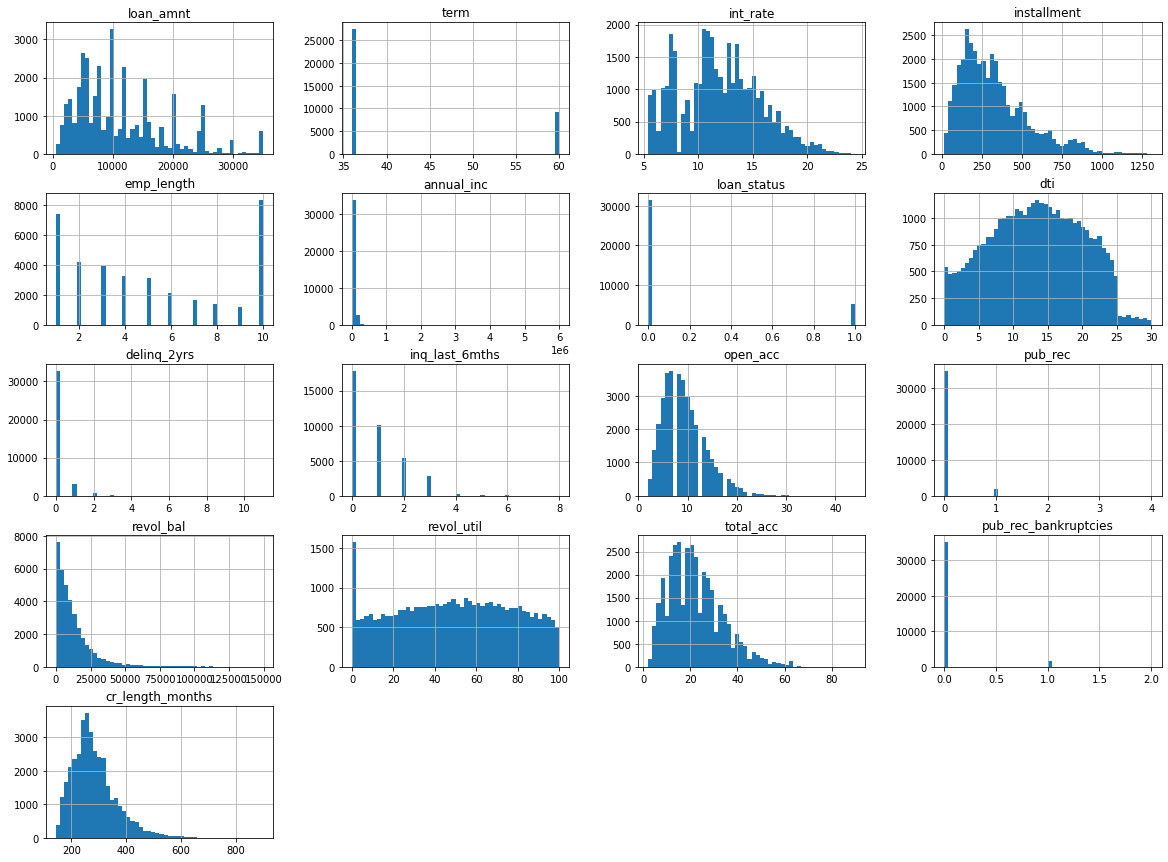

In [69]:
credit_data_clean.hist(bins=50, figsize=(20,15))

In [70]:
#Based on the histograms, the following columns appear to have outliers
outlier_columns = [
    'loan_amnt',
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'cr_length_months'
]

In [71]:
#Remove the top 3% of values from the outlier_columns. This percetange was an arbitrary choice.
for col in outlier_columns:
    outliers = credit_data_clean[col].quantile(0.97)
    credit_data_clean = credit_data_clean[credit_data_clean[col] < outliers]

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'loan_status'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>],
       [<AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>,
        <AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>],
       [<AxesSubplot:title={'center':'cr_length_months'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

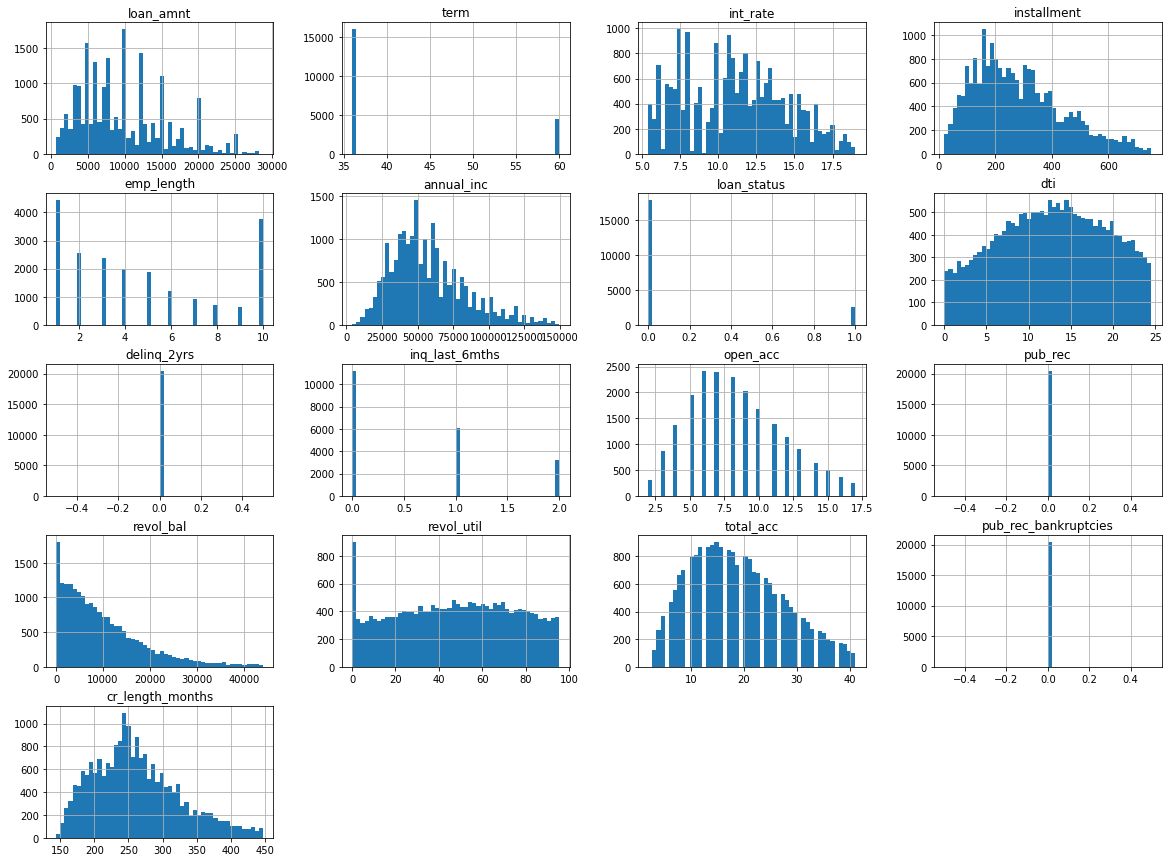

In [72]:
#View the histograms after the outliers have been removed
credit_data_clean.hist(bins=50, figsize=(20,15))

In [73]:
numRowsClean, numFeaturesClean = credit_data_clean.shape

In [74]:
print(f'The dataset now contains {numRowsClean} rows and {numFeaturesClean} columns, down from the original {numRows} rows and {numFeatures} columns.')

The dataset now contains 20487 rows and 22 columns, down from the original 39717 rows and 111 columns.


## Encode Categorical Variables

In [75]:
#The columns that contain categorical text variables need to be converted to numerical dummy columns in order to implement neural network
cat_columns = credit_data_clean.select_dtypes(include = 'object').copy()

In [76]:
for col in cat_columns:
    dummy_columns = pd.get_dummies(credit_data_clean[col]).iloc[:, 1:]
    credit_data_clean = pd.concat([credit_data_clean, dummy_columns], axis=1)

In [77]:
#Remove the categorical text columns now that the dummy columns have been created
credit_data_clean.drop(cat_columns, axis=1, inplace=True)

In [78]:
credit_data_clean.head(5)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,cr_length_months,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,OTHER,OWN,RENT,Source Verified,Verified,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
3,10000,36,13.49,339.31,10,49200.0,0,20.00,0,1,10,0,5598,21.0,37,0.0,297,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,7000,60,15.96,170.08,8,47004.0,0,23.51,0,1,7,0,17726,85.6,11,0.0,184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,3000,36,18.64,109.43,9,48000.0,0,5.35,0,2,4,0,8221,87.5,4,0.0,166,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5375,60,12.69,121.45,1,15000.0,1,18.08,0,0,2,0,9279,36.5,3,0.0,194,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
10,6500,60,14.65,153.45,5,72000.0,0,16.12,0,2,14,0,4032,20.6,23,0.0,274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Split into train and test sets

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
y = credit_data_clean['loan_status']
X = credit_data_clean.drop(columns='loan_status', axis=1)

In [81]:
#80% will be used for training and 20% will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature normalization using StandardScaler

In [82]:
#The columns need to all have the same scale in order to be able to compare the values between columns accurately
#StandardScaler rescales the values so that the mean of the column is 0 and the standard deviation is 1
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
scaler.fit(X_train)

StandardScaler()

In [85]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [86]:
X_train.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,cr_length_months,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,OTHER,OWN,RENT,Source Verified,Verified,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,-0.385541,-0.526401,0.411383,-0.203561,-0.830353,-0.661581,0.014781,0.0,-0.818385,-0.093789,0.0,-1.113351,-1.706168,-0.667706,0.0,-0.763207,-0.696165,2.027015,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,-0.265870,-0.269925,4.155828,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,1.640746,-0.593676,-0.394693,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,5.026373,-0.095786,-0.165124
1,-1.002550,-0.526401,-0.009512,-0.961703,-0.219524,0.022442,-1.083717,0.0,-0.818385,-0.389218,0.0,-1.052963,-1.555442,1.037453,0.0,0.106181,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,4.241548,-0.252462,-0.294747,-0.265870,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,3.529258,-1.094980,-0.609479,-0.593676,-0.394693,-0.939412,-0.091475,3.853582,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
2,0.121288,-0.526401,0.163085,0.379824,1.612962,-0.434514,1.056865,0.0,-0.818385,1.087925,0.0,1.657156,1.113508,0.355390,0.0,-0.146732,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,3.392740,-0.265870,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,-1.094980,-0.609479,1.684421,-0.394693,1.064496,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
3,-0.949663,-0.526401,-0.130632,-0.904548,-1.135767,-0.661581,-1.047675,0.0,-0.818385,-0.684647,0.0,-0.517748,0.837790,-1.349770,0.0,-1.521945,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,3.761243,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,3.529258,-1.094980,1.640746,-0.593676,2.533613,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
4,-0.297396,-0.526401,0.217590,-0.112923,-0.830353,-0.661581,0.456687,0.0,-0.818385,-0.684647,0.0,-0.327381,1.705383,0.923776,0.0,-0.620943,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,3.761243,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,-0.609479,-0.593676,-0.394693,1.064496,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124


In [87]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [88]:
X_test.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,cr_length_months,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,OTHER,OWN,RENT,Source Verified,Verified,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,-0.826262,-0.526401,-0.581807,-0.782136,-1.135767,-1.087195,-1.707400,0.0,-0.818385,-1.866361,0.0,-1.013049,0.304736,-1.463447,0.0,-1.047734,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,3.960986,-0.294747,-0.26587,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,-0.609479,1.684421,-0.394693,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,7.463869,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
1,-0.826262,1.899692,-0.245697,-1.114179,0.391304,-1.018793,-0.348773,0.0,1.879766,-1.275504,0.0,-1.119217,-1.430450,-0.667706,0.0,-1.000312,1.436442,-0.493336,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,-0.26587,3.704736,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,-0.609479,1.684421,-0.394693,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
2,-0.914406,1.899692,1.695262,-1.087849,-0.219524,0.280850,-0.369145,0.0,0.530691,-0.389218,0.0,2.042722,0.473843,-0.326674,0.0,-0.779014,-0.696165,-0.493336,-0.352898,4.762723,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,-0.26587,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,9.977275,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,-1.094980,-0.609479,-0.593676,-0.394693,-0.939412,-0.091475,-0.259499,-0.086959,3.908334,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
3,2.258785,1.899692,1.695262,1.729516,-0.219524,-0.338570,-0.292360,0.0,-0.818385,-0.389218,0.0,1.507162,1.363493,-0.781383,0.0,1.275902,-0.696165,-0.493336,2.833682,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,-0.26587,-0.269925,-0.240626,-0.229938,-0.195948,-0.173327,-0.158977,-0.141567,5.579901,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,-0.609479,1.684421,2.533613,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124
4,-0.896777,-0.526401,0.853473,-0.797264,-1.135767,0.022442,-1.370486,0.0,0.530691,-0.389218,0.0,-0.008185,0.767942,-0.895060,0.0,-1.221611,-0.696165,2.027015,-0.352898,-0.209964,-0.082951,-0.007812,-0.218225,-0.243451,-0.319844,-0.305975,-0.235763,-0.252462,-0.294747,-0.26587,-0.269925,-0.240626,-0.229938,5.103387,-0.173327,-0.158977,-0.141567,-0.179215,-0.156948,-0.135854,-0.134685,-0.126965,-0.100228,-0.091135,-0.069152,-0.058555,-0.051884,-0.051884,-0.03126,-0.019137,-0.011048,-0.007812,-0.053629,-0.283346,0.913259,-0.609479,-0.593676,2.533613,-0.939412,-0.091475,-0.259499,-0.086959,-0.255863,-0.133979,-0.129667,-0.337061,-0.052472,-0.198951,-0.095786,-0.165124


## Perform SMOTE Oversampling

In [89]:
#We will perform SMOTE oversampling to correct the imbalanced dataset
#SMOTE creates new rows of the minority class (the 1 / loan default class) by using a KNN algorithm to create rows 
#that are similar to the rows of the minority class already present in the data)
#This will change the data so that the training set contains just as much 1 values as 0 values in the loan_status column

In [90]:
from imblearn.over_sampling import SMOTE 

In [91]:
y_train_num_ones = sum(y_train == 1)
y_train_num_zeros = sum(y_train == 0)

In [92]:
print(f'Before Oversampling, y_train contained {y_train_num_ones} 1 values.') 
print(f'Before Oversampling, y_train contained {y_train_num_zeros} 0 values.') 

Before Oversampling, y_train contained 2014 1 values.
Before Oversampling, y_train contained 14375 0 values.


In [93]:
sm = SMOTE(random_state = 42) 
X_train, y_train = sm.fit_resample(X_train, y_train) 

In [94]:
y_train_num_ones = sum(y_train == 1)
y_train_num_zeros = sum(y_train == 0)

In [95]:
#Ensure that y_train contains equal numbers of 1 values and 0 values
print(f'After Oversampling, y_train contains {y_train_num_ones} 1 values.') 
print(f'After Oversampling, y_train contains {y_train_num_zeros} 0 values.') 

After Oversampling, y_train contains 14375 1 values.
After Oversampling, y_train contains 14375 0 values.


## Implement Neural Network

### Set up neural network

In [96]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [97]:
X_train.shape

(28750, 70)

In [98]:
num_columns = X_train.shape[1]

In [99]:
nn_model = Sequential()

In [100]:
#Add a hidden layer to the model
#Set the layer type as 'Dense'. In a dense layer, all the nodes in the previous layer connect to all the nodes in the current layer.
nn_model.add(Dense(70, activation='relu', input_shape=(num_columns,)))

In [101]:
#Add a second hidden layer to the model
nn_model.add(Dense(70, activation='relu', input_shape=(num_columns,)))

In [102]:
#Add the output layer to the model
#1 output neuron because the output will be a number between 0 and 1, which can be interpreted as the probability of default (probability of '1')
#Sigmoid function is used to bound the output value between 0 and 1
nn_model.add(Dense(1, activation='sigmoid'))

In [103]:
#Number of parameters = number of number of weights + number of biases 
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 70)                4970      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [104]:
for layer in nn_model.layers:
    print(layer.get_weights())

[array([[-0.14809576, -0.0614602 ,  0.06787415, ..., -0.19462225,
        -0.20212476,  0.12740122],
       [-0.11829305,  0.116273  , -0.11630385, ..., -0.0547163 ,
         0.13899331,  0.01561138],
       [ 0.01924324, -0.07586277, -0.02337036, ..., -0.0701618 ,
        -0.06903575, -0.14004429],
       ...,
       [-0.14613152,  0.01951599, -0.04193532, ..., -0.05645986,
        -0.18727624,  0.18497519],
       [-0.13972357, -0.00348788, -0.02738804, ..., -0.04404032,
        -0.09615362, -0.11174999],
       [-0.02810441,  0.07853355, -0.15658422, ..., -0.0671248 ,
         0.02789292,  0.15169518]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)]
[array([[-0.08259881, -0.10054089,  0.

### Compile, train, and test neural network

In [105]:
#Compile the neural network
nn_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [106]:
#Fitting the data to the training dataset
nn_model.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
2875/2875 [==============================] - 2s 648us/step - loss: 0.5940 - accuracy: 0.6837
Epoch 2/100
2875/2875 [==============================] - 2s 647us/step - loss: 0.5147 - accuracy: 0.7472
Epoch 3/100
2875/2875 [==============================] - 2s 640us/step - loss: 0.4512 - accuracy: 0.7911
Epoch 4/100
2875/2875 [==============================] - 2s 656us/step - loss: 0.3997 - accuracy: 0.8223
Epoch 5/100
2875/2875 [==============================] - 2s 635us/step - loss: 0.3581 - accuracy: 0.8447
Epoch 6/100
2875/2875 [==============================] - 2s 750us/step - loss: 0.3241 - accuracy: 0.8635
Epoch 7/100
2875/2875 [==============================] - 2s 601us/step - loss: 0.2933 - accuracy: 0.87851s - loss: 0.2869 - accuracy
Epoch 8/100
2875/2875 [==============================] - 2s 616us/step - loss: 0.2696 - accuracy: 0.8913
Epoch 9/100
2875/2875 [==============================] - 2s 634us/step - loss: 0.2481 - accuracy: 0.8994
Epoch 10/100
2875/2875 [===

2875/2875 [==============================] - 2s 605us/step - loss: 0.0483 - accuracy: 0.9827
Epoch 79/100
2875/2875 [==============================] - 2s 630us/step - loss: 0.0461 - accuracy: 0.9869
Epoch 80/100
2875/2875 [==============================] - 2s 552us/step - loss: 0.0383 - accuracy: 0.9872
Epoch 81/100
2875/2875 [==============================] - 2s 547us/step - loss: 0.0399 - accuracy: 0.9852
Epoch 82/100
2875/2875 [==============================] - 2s 546us/step - loss: 0.0391 - accuracy: 0.9865
Epoch 83/100
2875/2875 [==============================] - 2s 552us/step - loss: 0.0398 - accuracy: 0.9866
Epoch 84/100
2875/2875 [==============================] - 2s 563us/step - loss: 0.0355 - accuracy: 0.9877
Epoch 85/100
2875/2875 [==============================] - 2s 578us/step - loss: 0.0410 - accuracy: 0.9860
Epoch 86/100
2875/2875 [==============================] - 2s 550us/step - loss: 0.0377 - accuracy: 0.9873
Epoch 87/100
2875/2875 [==============================] - 2

In [107]:
for layer in nn_model.layers:
    print(layer.get_weights())

[array([[-0.28110018, -0.01785865, -0.03445371, ..., -0.9049954 ,
        -0.54835707,  0.18165955],
       [-2.0162609 ,  0.02273043, -0.5825404 , ..., -2.464784  ,
        -0.5732048 , -0.25750813],
       [ 0.44936046, -0.09820409, -0.31808105, ..., -0.28417975,
        -0.08013067, -0.62937075],
       ...,
       [-0.13947374,  0.25420672, -0.08595149, ..., -0.02693713,
        -0.8114456 ,  0.30907622],
       [ 0.20607597, -0.06805152,  0.35446775, ...,  0.0346738 ,
        -0.10864928, -0.06259874],
       [ 0.35113123,  0.34086713, -0.42877692, ..., -0.6866919 ,
         0.55706537,  0.15721868]], dtype=float32), array([-1.4324393 , -0.87833285, -0.14141223, -0.38032532, -0.37736583,
       -0.33256152, -1.1274776 , -0.750402  , -0.75270253, -1.7723601 ,
       -0.19914688, -0.29978564, -0.5419874 , -0.5183884 , -1.2613823 ,
       -0.2369676 , -0.36495113, -1.107815  , -0.07956437, -1.461764  ,
       -1.4537525 , -0.2697868 , -0.29922885, -1.0467925 , -0.7191818 ,
       -0.

In [108]:
#Test neural network
predictions = nn_model.predict(X_test)
predictions = np.round(predictions, decimals=0)

## Metrics evaluation

### Confusion Matrix

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(conf_matrix)

Confusion matrix:
[[3129  459]
 [ 412   98]]


### Classification report

In [111]:
from sklearn.metrics import classification_report

In [112]:
#Precision is the proportion of positive results that were correctly identified
#Precision = (TP / (TP + FP))
print('Classification report:\n')
print(classification_report(y_test, predictions))

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3588
           1       0.18      0.19      0.18       510

    accuracy                           0.79      4098
   macro avg       0.53      0.53      0.53      4098
weighted avg       0.80      0.79      0.79      4098



### Sensitivity & Specificity

In [113]:
#Sensitivity tells us the percentage of people that defaulted on a loan that were correctly identified by the model
#Sensitivity = (True Positives) / (True Positives + False Negatives)
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]

In [114]:
sensitivity = round(((TP / (TP + FN)) * 100), 2)
print('Sensitivity of neural network: ', sensitivity)
print(f'Therefore, {sensitivity}% of people that ended up defaulting on their loan were correctly identified by the neural network model.')

Sensitivity of neural network:  19.22
Therefore, 19.22% of people that ended up defaulting on their loan were correctly identified by the neural network model.


In [115]:
#Specificity tells us what percentage of people who didn't default on the loan were correctly identified
#Specificity = (True Negatives) / (True Negatives + False Positives)
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]

In [116]:
specificity = round(((TN / (TN + FP)) * 100), 2)
print('Specificity of neural network: ', specificity)
print(f'Therefore, {specificity}% of people that did repay their loan in full were correctly identified by the neural network model.')

Specificity of neural network:  87.21
Therefore, 87.21% of people that did repay their loan in full were correctly identified by the neural network model.


### Accuracy score

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracyScore = accuracy_score(y_test, predictions)
accuracyScore = round((accuracyScore * 100), 2)
print(f'Accuracy of the neural network model: {accuracyScore}%')

Accuracy of the neural network model: 78.75%


### Precision score

In [119]:
precision = round((TP / (TP + FP)) * 100, 2)

In [120]:
print(f'Precision of the neural network model: {precision}%')

Precision of the neural network model: 17.59%
